Saving PIC_1.png to PIC_1 (1).png
Original size: (1366, 768)
New size: (1200, 600)


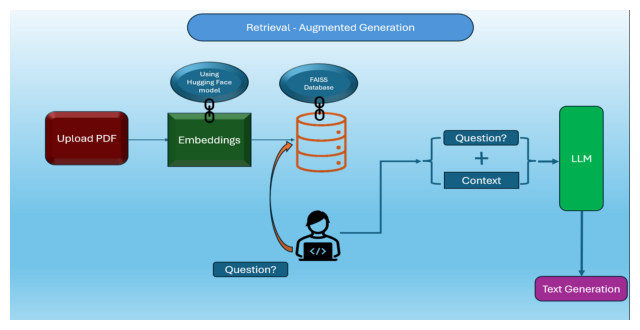

In [ ]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Upload the image
uploaded = files.upload()

# Load and resize the image using PIL
for file_name in uploaded.keys():
    image = Image.open(file_name)

    # Resize the image (e.g., to 1200x600 pixels)
    new_width = 1200
    new_height = 600
    resized_image = image.resize((new_width, new_height))

    # Check the new size
    print("Original size:", image.size)
    print("New size:", resized_image.size)

    # Display the resized image
    plt.figure(figsize=(8, 6))
    plt.imshow(resized_image)
    plt.axis('off')  # Hide axes
    plt.show()


In [ ]:
!pip install langchain-community

In [ ]:
!pip install pypdf
from langchain.document_loaders import PyPDFLoader

raw_doc=PyPDFLoader("/content/DATA/paracetamol.pdf")
raw_doc

In [ ]:
raw_load=raw_doc.load()
raw_load

[Document(metadata={'source': '/content/DATA/paracetamol.pdf', 'page': 0}, page_content=' 1Package leaflet: Information for the user \n \nParacetamol 500 mg tablets \nparacetamol  \n \n \nRead all of this leaflet carefully before you start taking this  medicine because it contains \nimportant information for you. \nAlways take this medicine exactly as described in this leaflet or as your doctor or pharmacist told you. \n- Keep this leaflet. You may need to read it again. \n- Ask your pharmacist if you need more information or advice. \n- If you get any side effects, talk to your doctor, or pharmacist . This includes any possible side \neffects not listed in this leaflet. See section 4. You must talk to a doctor if you do not feel better or if you f eel worse after 3 days of fever and 5 \ndays of pain or if other symptoms appear.   \n \nWhat is in this leaflet  \n1. What Paracetamol is and what it is used for \n2. What you need to know before you take Paracetamol \n3. How to take Parace

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitted_text=RecursiveCharacterTextSplitter(chunk_size=100,chunk_overlap=20)
splitted_text

In [ ]:
text_split=splitted_text.split_documents(raw_load)
text_split

[Document(metadata={'source': '/content/DATA/paracetamol.pdf', 'page': 0}, page_content='1Package leaflet: Information for the user \n \nParacetamol 500 mg tablets \nparacetamol'),
 Document(metadata={'source': '/content/DATA/paracetamol.pdf', 'page': 0}, page_content='Read all of this leaflet carefully before you start taking this  medicine because it contains'),
 Document(metadata={'source': '/content/DATA/paracetamol.pdf', 'page': 0}, page_content='important information for you.'),
 Document(metadata={'source': '/content/DATA/paracetamol.pdf', 'page': 0}, page_content='Always take this medicine exactly as described in this leaflet or as your doctor or pharmacist told'),
 Document(metadata={'source': '/content/DATA/paracetamol.pdf', 'page': 0}, page_content='or pharmacist told you.'),
 Document(metadata={'source': '/content/DATA/paracetamol.pdf', 'page': 0}, page_content='- Keep this leaflet. You may need to read it again.'),
 Document(metadata={'source': '/content/DATA/paracetamol.p

In [ ]:
!pip install sentence_transformers
from langchain.embeddings import HuggingFaceEmbeddings

In [ ]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavio

In [ ]:
!pip install faiss-cpu
from langchain.vectorstores import FAISS
db=FAISS.from_documents(text_split,embeddings)
db

In [ ]:
retriver=db.as_retriever()
retriver

VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7863e23d8850>, search_kwargs={})

In [ ]:
!pip install torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 autoawq==0.2.6 autoawq-kernels==0.0.7

In [ ]:
!pip install transformers

In [ ]:
from huggingface_hub import login
login(token = 'fill the token.....')

In [ ]:
import os

# Path to the cached Hugging Face token
token_file_path = "/root/.cache/huggingface/token"

# Read the token from the file
with open(token_file_path, 'r') as token_file:
    token = token_file.read().strip()

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM,AwqConfig





In [ ]:
model_id = "hugging-quants/Meta-Llama-3.1-8B-Instruct-AWQ-INT4"

quantization_config = AwqConfig(
    bits=4,
    fuse_max_seq_len=512, # Note: Update this as per your use-case
    do_fuse=True,
)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_id)

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
  model_id,
  torch_dtype=torch.float16,
  low_cpu_mem_usage=True,
  device_map="auto",
  quantization_config=quantization_config
)

config.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/quantizers/auto.py:174: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.However, loading attributes (e.g. ['version', 'fuse_max_seq_len', 'exllama_config', 'modules_to_fuse', 'do_fuse']) will be overwritten with the one you passed to `from_pretrained`. The rest will be ignored.
  warnings.warn(warning_msg)


model.safetensors.index.json:   0%|          | 0.00/63.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.68G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.05G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

In [ ]:
from transformers import pipeline
from langchain.llms import HuggingFacePipeline

text_generation_pipeline = pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    temperature=0.2,
    do_sample=True,
    repetition_penalty=1.1,
    return_full_text=True,
    max_new_tokens=400,
)

llm = HuggingFacePipeline(pipeline=text_generation_pipeline)

<ipython-input-22-bd995e184e89>:15: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=text_generation_pipeline)


In [ ]:
question="What age group can have Paracetamol?"
context_doc=retriver.invoke(question)
context_doc

[Document(metadata={'source': '/content/DATA/paracetamol.pdf', 'page': 1}, page_content='Paracetamol is not recommended for children under 12 years of a ge. Other formulations containing'),
 Document(metadata={'source': '/content/DATA/paracetamol.pdf', 'page': 2}, page_content='Paracetamol is not recommended for children under 12 years of a ge. Other formulations containing'),
 Document(metadata={'source': '/content/DATA/paracetamol.pdf', 'page': 0}, page_content='of pain or if other symptoms appear.   Paracetamol is indicated in adults  and adolescents aged 12'),
 Document(metadata={'source': '/content/DATA/paracetamol.pdf', 'page': 1}, page_content='- if you are elderly - if you have alcohol problems or liver damage and also do not use Paracetamol')]

In [ ]:
context=" ".join([i.page_content for i in context_doc])
context

'Paracetamol is not recommended for children under 12 years of a ge. Other formulations containing Paracetamol is not recommended for children under 12 years of a ge. Other formulations containing of pain or if other symptoms appear.   Paracetamol is indicated in adults  and adolescents aged 12 - if you are elderly - if you have alcohol problems or liver damage and also do not use Paracetamol'

In [ ]:
from langchain.prompts import PromptTemplate

prompt_template = """Use the following context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.

{context}

{question}
"""

In [ ]:
prompt = PromptTemplate(
    input_variables=["context", "question"],
    template=prompt_template,
)

In [ ]:
from langchain.schema.output_parser import StrOutputParser
llm_chain = prompt | llm | StrOutputParser()
llm_chain

PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="Use the following context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\n{context}\n\n{question}\n")
| HuggingFacePipeline(pipeline=<transformers.pipelines.text_generation.TextGenerationPipeline object at 0x7863c9584160>)
| StrOutputParser()

In [ ]:
llm_chain.invoke({"context":context, "question": question})

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


'Use the following context to answer the question at the end. If you don\'t know the answer, just say that you don\'t know, don\'t try to make up an answer.\n\nParacetamol is not recommended for children under 12 years of a ge. Other formulations containing Paracetamol is not recommended for children under 12 years of a ge. Other formulations containing of pain or if other symptoms appear.   Paracetamol is indicated in adults  and adolescents aged 12 - if you are elderly - if you have alcohol problems or liver damage and also do not use Paracetamol\n\nWhat age group can have Paracetamol?\na) Children under 6 years old\nb) Children under 12 years old\nc) Children under 18 years old\nd) All ages\n\nAnswer: b) Children under 12 years old\nExplanation: The text states "Paracetamol is not recommended for children under 12 years of age." Therefore, the correct answer is (b). \nNote: This question requires the test-taker to read and understand the given text, and then choose the correct answe